In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder, QuantileTransformer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:\\Users\\Dell\\Project\\Loan Default Predictor.csv')

In [3]:
df

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96371,11537800,35000,35000,35000.00000,60,BAT5629144,16.240000,C,C5,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,109,0,0,883984,114000,0
96372,11538258,25000,25000,25000.00000,60,BAT5629144,14.980000,C,C3,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,104,0,0,513925,51800,0
96373,13147685,30000,30000,29950.00000,60,BAT2136391,18.240000,D,D5,MORTGAGE,...,0.000000,0.000000,1,INDIVIDUAL,83,0,0,296294,65600,0
96374,13917689,25000,25000,24950.00000,60,BAT2136391,15.610000,D,D1,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,83,0,0,428723,30400,0


In [4]:
loan1.shape

(96376, 35)

In [120]:
loan1.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


In [121]:
loan2

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,...,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364,NaN
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,...,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573,NaN
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,...,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676,NaN
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,...,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226,NaN
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,...,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,11537800,35000,35000,35000.000000,60,BAT5629144,16.240000,C,C5,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,109,0,0,883984,114000,NaN
28909,11538258,25000,25000,25000.000000,60,BAT5629144,14.980000,C,C3,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,104,0,0,513925,51800,NaN
28910,13147685,30000,30000,29950.000000,60,BAT2136391,18.240000,D,D5,MORTGAGE,...,0.000000,0.000000,1,INDIVIDUAL,83,0,0,296294,65600,NaN
28911,13917689,25000,25000,24950.000000,60,BAT2136391,15.610000,D,D1,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,83,0,0,428723,30400,NaN


In [122]:
df3 = pd.concat([loan1,loan2], ignore_index=True)

In [203]:
df3['Loan Status'].isna().sum()

28913

In [204]:
df3['Loan Status'] = df3[['Loan Status']].fillna(value=0, axis = 1)

In [205]:
df3['Loan Status'].isna().sum()

0

In [272]:
df3['Total Accounts'].nlargest(20)

93126    73
26929    72
53853    72
80545    72
90946    72
93862    72
31405    71
64765    71
89354    71
90730    71
93140    71
55260    70
90651    70
91222    70
92800    70
49806    69
91114    69
3308     68
9338     68
48733    68
Name: Total Accounts, dtype: int64

In [206]:
df3

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0.0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0.0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0.0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0.0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96371,11537800,35000,35000,35000.00000,60,BAT5629144,16.240000,C,C5,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,109,0,0,883984,114000,0.0
96372,11538258,25000,25000,25000.00000,60,BAT5629144,14.980000,C,C3,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,104,0,0,513925,51800,0.0
96373,13147685,30000,30000,29950.00000,60,BAT2136391,18.240000,D,D5,MORTGAGE,...,0.000000,0.000000,1,INDIVIDUAL,83,0,0,296294,65600,0.0
96374,13917689,25000,25000,24950.00000,60,BAT2136391,15.610000,D,D1,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,83,0,0,428723,30400,0.0


In [207]:
df3.shape

(96376, 35)

In [208]:
df3.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,9.637600e+04,96376.000000,96376.000000,96376.000000,96376.000000,96376.000000,96376.000000,96376.000000,96376.000000,96376.000000,...,96376.000000,96376.000000,96376.000000,96376.000000,96376.000000,96376.000000,96376.000000,9.637600e+04,96376.000000,96376.000000
mean,2.677423e+07,16715.439259,15725.392401,14657.720784,57.084585,11.948654,80374.176313,22.957246,0.328609,0.185098,...,1.077636,56.971569,1.205565,0.020783,69.316541,0.000291,150.451886,1.576310e+05,23690.250332,0.064757
std,2.146078e+07,8367.617027,8175.017327,6922.046851,5.896938,3.780666,45090.364452,8.530055,0.806324,0.540999,...,5.106276,351.002990,8.792240,0.142659,43.163022,0.017043,798.277468,1.390935e+05,21353.728538,0.246097
min,1.297893e+06,1000.000000,1000.000000,1000.000000,36.000000,5.320000,14573.537170,0.675299,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.170000e+02,1000.000000,0.000000
25%,7.003730e+06,9953.000000,9238.000000,9800.036208,58.000000,9.326588,51459.374772,16.424179,0.000000,0.000000,...,0.015861,1.234178,0.386589,0.000000,33.000000,0.000000,21.000000,4.840525e+04,8500.750000,0.000000
50%,1.996712e+07,15947.000000,13076.000000,12826.006220,59.000000,11.471511,69217.985460,22.296056,0.000000,0.000000,...,0.039509,3.047889,0.732590,0.000000,65.000000,0.000000,34.000000,1.156710e+05,17362.000000,0.000000
75%,4.439923e+07,21987.250000,21724.000000,18382.681483,59.000000,14.330000,94650.134950,29.678280,0.000000,0.000000,...,0.069122,5.238548,1.046001,0.000000,102.000000,0.000000,46.000000,2.264792e+05,32654.000000,0.000000
max,7.226845e+07,35000.000000,35000.000000,35000.000000,60.000000,27.310000,406944.859000,39.629977,9.000000,5.000000,...,42.618882,4354.467419,743.166000,1.000000,161.000000,1.000000,27076.000000,1.183282e+06,233500.000000,1.000000


In [209]:
loan_75 = df3.sample(frac=0.75)

In [210]:
loan_25 = df3.drop(loan_75.index)

In [211]:
df3.shape

(96376, 35)

In [212]:
loan_25.shape

(24094, 35)

In [213]:
loan_75.shape

(72282, 35)

In [214]:
loan_75.groupby('Loan Status').size()

Loan Status
0.0    67640
1.0     4642
dtype: int64

In [215]:
loan_25.groupby('Loan Status').size()

Loan Status
0.0    22495
1.0     1599
dtype: int64

In [216]:
df3.columns[(df3.nunique() == 1)]

Index(['Payment Plan'], dtype='object')

In [275]:
df3['Recoveries'].describe()

count    96376.000000
mean        56.971569
std        351.002990
min          0.000000
25%          1.234178
50%          3.047889
75%          5.238548
max       4354.467419
Name: Recoveries, dtype: float64

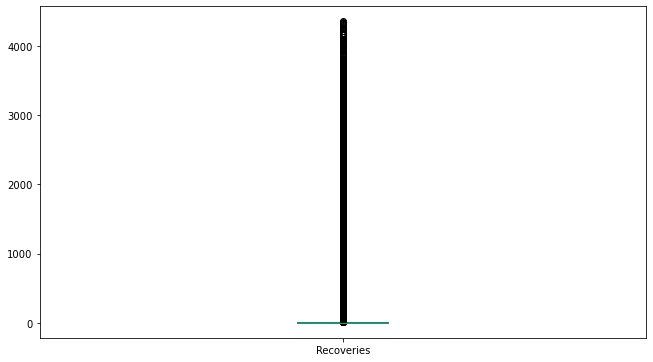

In [273]:
df3['Recoveries'].plot(kind='box', subplots=True, layout=(7,4), sharex=False, sharey=False, figsize = (50,50))
plt.show()

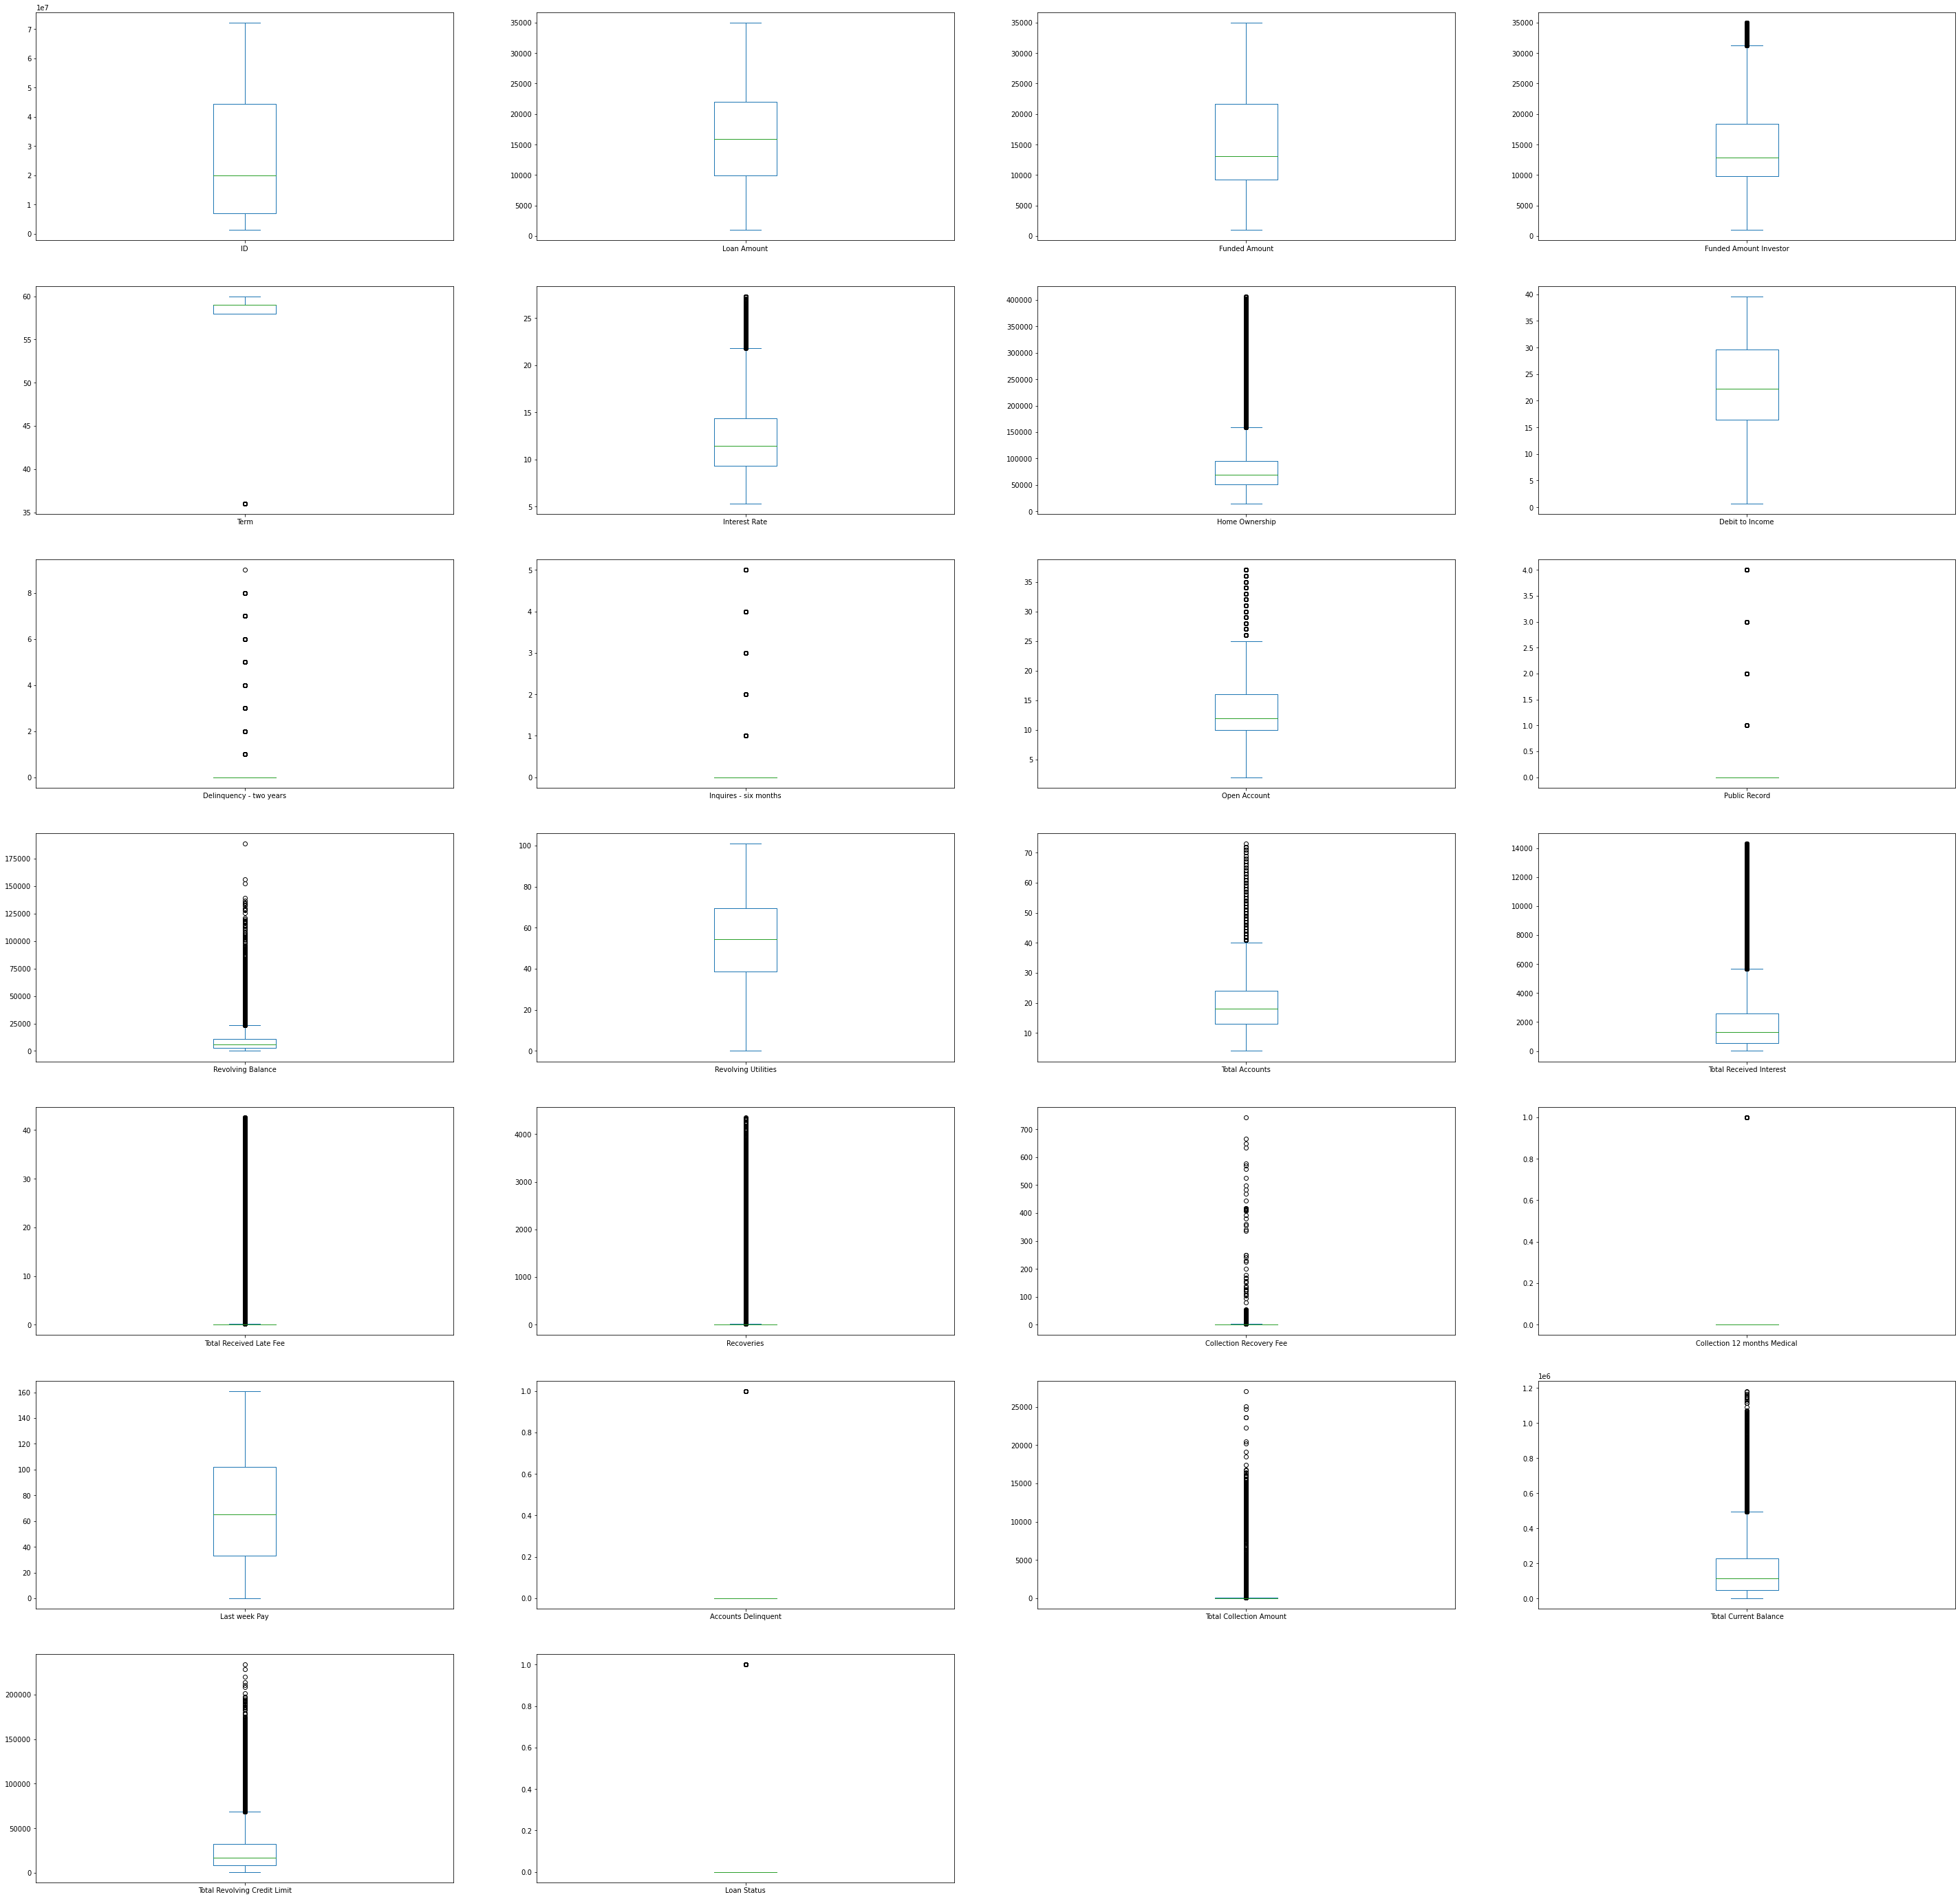

In [231]:
# box and whisker plots

df3.plot(kind='box', subplots=True, layout=(7,4), sharex=False, sharey=False, figsize = (50,50))
plt.show()

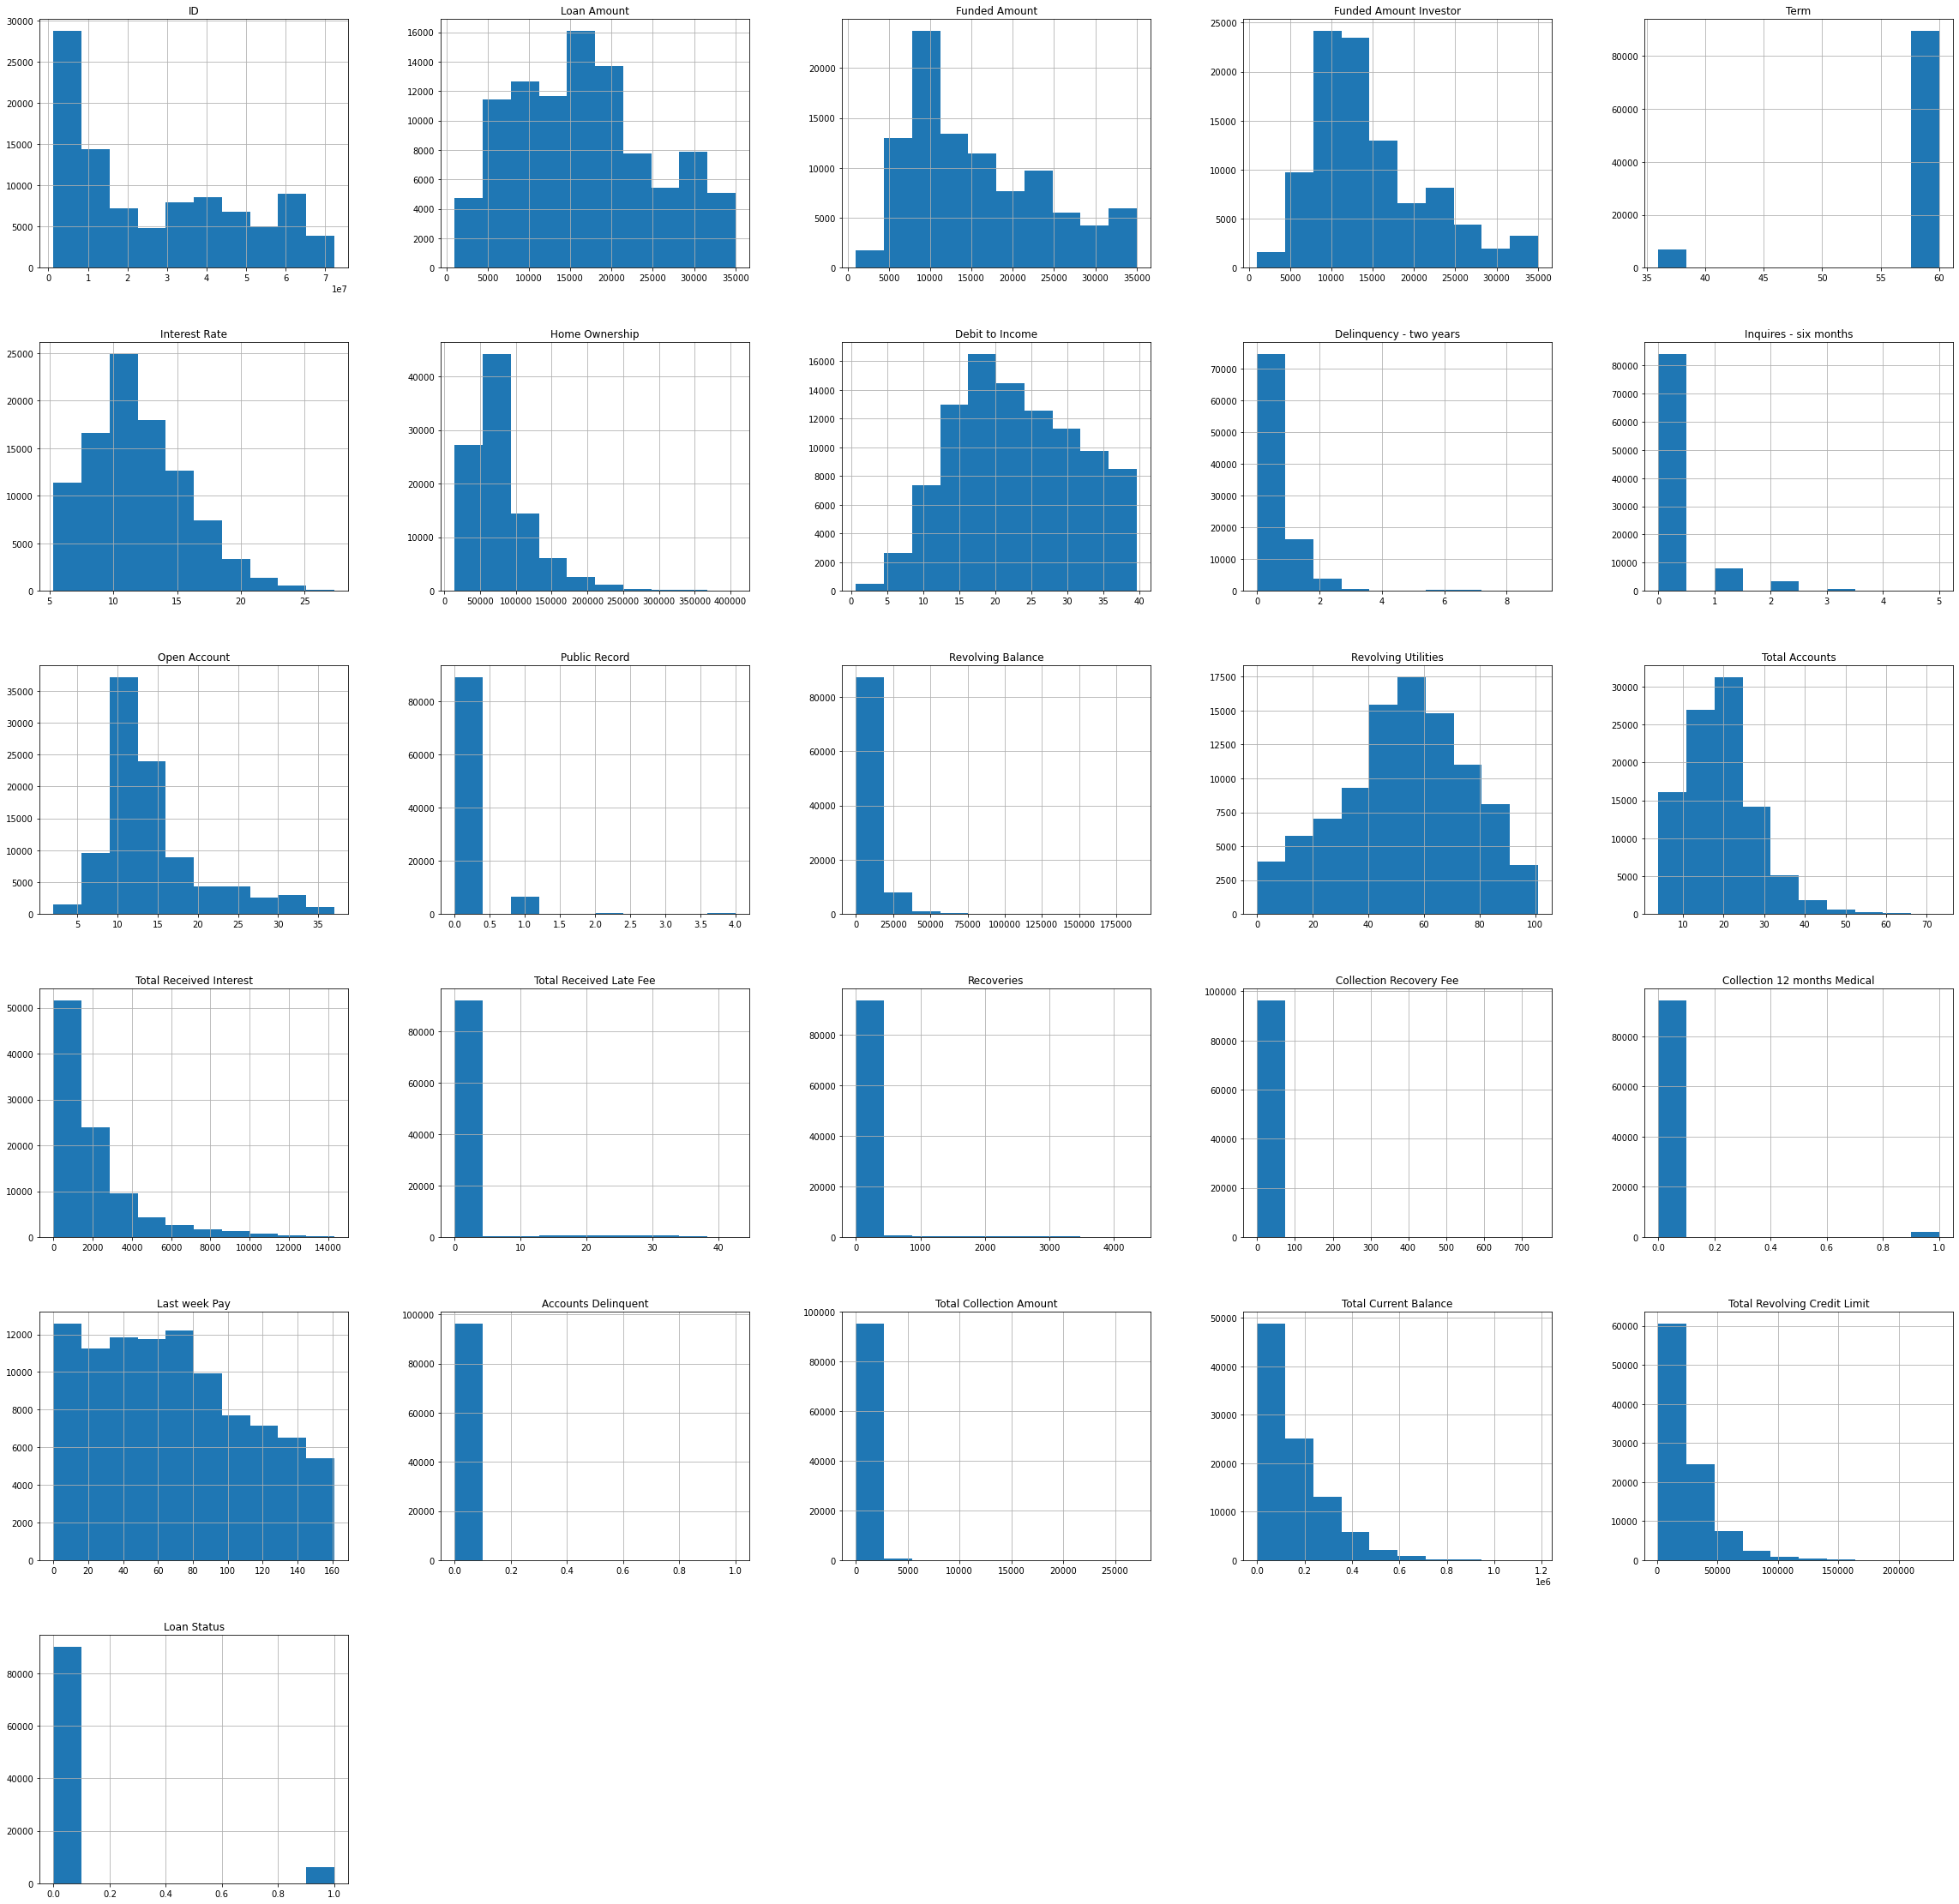

In [270]:
# Histograms

df3.hist(figsize=(40,40))
plt.show()

In [218]:
df3[['Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount']]

,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount
0,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31
1,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53
2,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34
3,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40
4,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430
...,...,...,...,...,...,...,...,...
96371,0.000000,0.000000,0.000000,0,INDIVIDUAL,109,0,0
96372,0.000000,0.000000,0.000000,0,INDIVIDUAL,104,0,0
96373,0.000000,0.000000,0.000000,1,INDIVIDUAL,83,0,0
96374,0.000000,0.000000,0.000000,0,INDIVIDUAL,83,0,0


In [219]:
df3['Recoveries'].describe()

count    96376.000000
mean        56.971569
std        351.002990
min          0.000000
25%          1.234178
50%          3.047889
75%          5.238548
max       4354.467419
Name: Recoveries, dtype: float64

In [220]:
df3.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [221]:
df3.shape

(96376, 35)

In [222]:
df3['Loan Status'].value_counts()

0.0    90135
1.0     6241
Name: Loan Status, dtype: int64

In [223]:
df3['Loan Status'].isna().sum()

0

In [224]:
df3.corr().round(decimals=4)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
ID,1.0000,-0.0118,-0.0068,0.0063,-0.1121,0.0082,-0.0095,-0.0288,0.0001,0.0255,...,-0.0076,-0.0122,-0.0151,0.0014,-0.0771,0.0127,0.0069,-0.0110,0.0178,-0.0137
Loan Amount,-0.0118,1.0000,0.0809,0.0935,0.1020,-0.0015,0.0499,0.0149,-0.0047,-0.0132,...,0.0040,0.0013,-0.0009,-0.0033,0.0063,-0.0081,-0.0082,0.0205,0.0357,0.0005
Funded Amount,-0.0068,0.0809,1.0000,0.1046,0.0776,0.0130,0.0330,0.0073,0.0092,-0.0120,...,0.0015,0.0038,0.0005,0.0003,0.0010,-0.0062,-0.0043,0.0249,0.0395,0.0026
Funded Amount Investor,0.0063,0.0935,0.1046,1.0000,0.0614,0.0148,0.0391,0.0008,0.0010,-0.0045,...,-0.0022,0.0022,-0.0001,-0.0021,0.0024,-0.0047,0.0019,0.0333,0.0523,-0.0014
Term,-0.1121,0.1020,0.0776,0.0614,1.0000,0.0045,0.0248,0.1143,-0.0035,-0.1666,...,0.0346,0.0207,-0.0055,0.0018,0.0945,-0.0486,-0.0183,0.0451,-0.0509,0.0470
Interest Rate,0.0082,-0.0015,0.0130,0.0148,0.0045,1.0000,-0.0125,-0.0117,0.0065,0.0655,...,-0.0025,0.0108,0.0295,-0.0076,-0.0211,0.0073,0.0046,-0.0149,-0.0031,-0.0048
Home Ownership,-0.0095,0.0499,0.0330,0.0391,0.0248,-0.0125,1.0000,0.0059,0.0006,-0.0017,...,0.0045,0.0039,-0.0062,-0.0029,0.0026,0.0033,0.0027,0.0461,0.0362,0.0040
Debit to Income,-0.0288,0.0149,0.0073,0.0008,0.1143,-0.0117,0.0059,1.0000,-0.0029,-0.0352,...,-0.0020,-0.0071,-0.0019,0.0017,0.0245,-0.0117,-0.0033,-0.0052,-0.0124,0.0081
Delinquency - two years,0.0001,-0.0047,0.0092,0.0010,-0.0035,0.0065,0.0006,-0.0029,1.0000,0.0083,...,0.0092,0.0132,-0.0014,0.0088,0.0030,0.0353,0.0046,0.0060,0.0003,0.0077
Inquires - six months,0.0255,-0.0132,-0.0120,-0.0045,-0.1666,0.0655,-0.0017,-0.0352,0.0083,1.0000,...,-0.0052,0.0094,0.0246,-0.0013,-0.0307,0.0077,0.0082,-0.0070,0.0242,-0.0187


([<matplotlib.patches.Wedge at 0x233e2b68e50>,
 [Text(-1.0773152001539839, 0.22224301905162683, 'Not Defaulted on Loan'),
  Text(1.0773151845480615, -0.22224309470077253, 'Defaulted on Loan')],
 [Text(-0.5876264728112639, 0.12122346493725099, '93.52%'),
  Text(0.5876264642989425, -0.12122350620042137, '6.48%')])

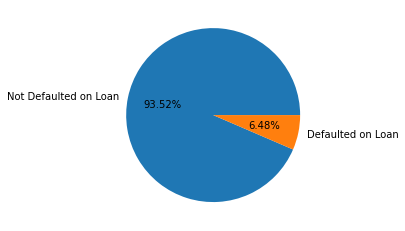

In [225]:

loan_default_count = df3['Loan Status'].value_counts()

plt.pie(loan_default_count, autopct = '%1.2f%%', labels=["Not Defaulted on Loan","Defaulted on Loan"])


([<matplotlib.patches.Wedge at 0x233809adeb0>,
 [Text(-1.0776880057932192, 0.2204281337974681, 'Not Defaulted on Loan'),
  Text(1.077688021271695, -0.22042805812214314, 'Defaulted on Loan')],
 [Text(-0.5878298213417559, 0.12023352752589167, '93.58%'),
  Text(0.5878298297845609, -0.12023348624844168, '6.42%')])

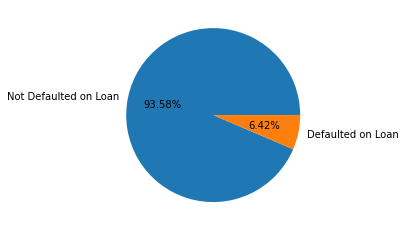

In [226]:
loan_default_count = loan_75['Loan Status'].value_counts()

plt.pie(loan_default_count, autopct = '%1.2f%%', labels=["Not Defaulted on Loan","Defaulted on Loan"])

([<matplotlib.patches.Wedge at 0x233800262b0>,
 [Text(-1.0761785772342054, 0.2276832666274829, 'Not Defaulted on Loan'),
  Text(1.0761785825635166, -0.22768324143770519, 'Defaulted on Loan')],
 [Text(-0.5870064966732029, 0.12419087270589975, '93.36%'),
  Text(0.5870064995801, -0.124190858966021, '6.64%')])

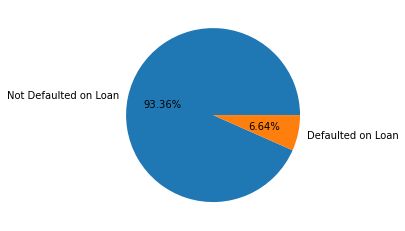

In [227]:
loan_default_count = loan_25['Loan Status'].value_counts()

plt.pie(loan_default_count, autopct = '%1.2f%%', labels=["Not Defaulted on Loan","Defaulted on Loan"])

In [239]:
x1 = df3.corr()

In [279]:
x1.iloc[:,1]

ID                             -0.011808
Loan Amount                     1.000000
Funded Amount                   0.080939
Funded Amount Investor          0.093500
Term                            0.101967
Interest Rate                  -0.001493
Home Ownership                  0.049870
Debit to Income                 0.014854
Delinquency - two years        -0.004705
Inquires - six months          -0.013167
Open Account                    0.026257
Public Record                  -0.015701
Revolving Balance               0.038556
Revolving Utilities             0.023294
Total Accounts                  0.002663
Total Received Interest         0.037556
Total Received Late Fee         0.003978
Recoveries                      0.001263
Collection Recovery Fee        -0.000925
Collection 12 months Medical   -0.003255
Last week Pay                   0.006283
Accounts Delinquent            -0.008064
Total Collection Amount        -0.008208
Total Current Balance           0.020490
Total Revolving 